In [46]:
# Importing all important libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tabulate import tabulate

In [19]:
# Read dataframe 
df = pd.read_csv('Customer-Churn-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [21]:
df.duplicated().sum()

0

In [22]:
print(df.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')


In [23]:
df.drop(columns=['RowNumber' ,'CustomerId','Surname'],inplace=True)

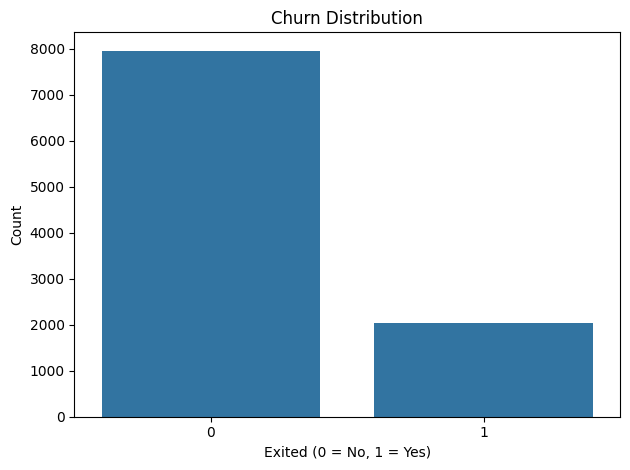

In [24]:
sns.countplot(x='Exited', data=df)
plt.title('Churn Distribution')
plt.xlabel('Exited (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


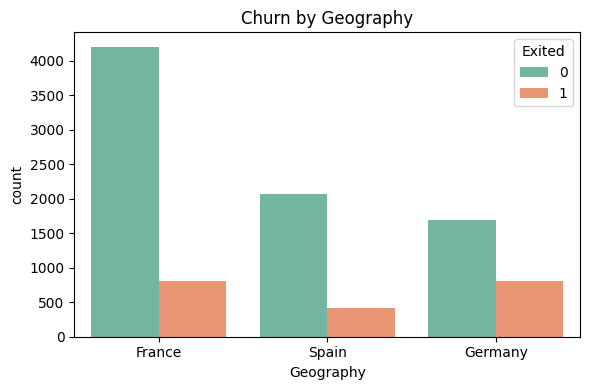

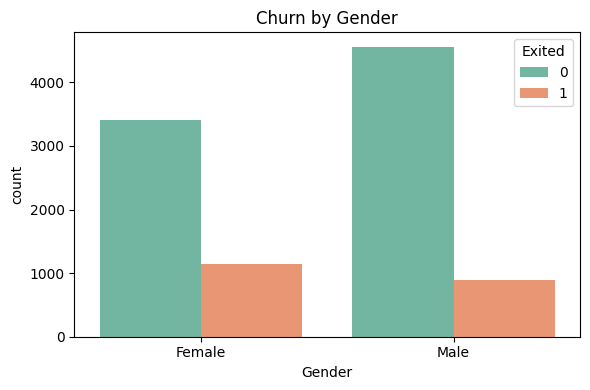

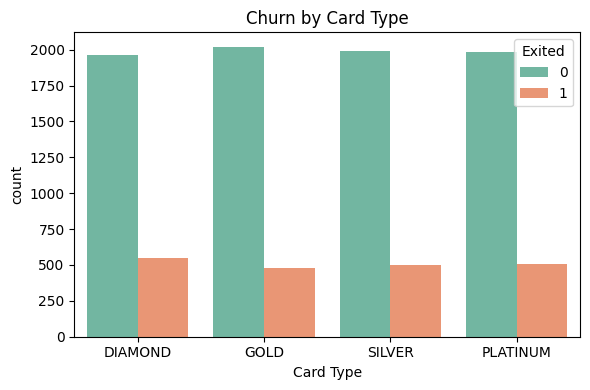

In [25]:
# 📊 Bar plots for categorical features
categorical_cols = ['Geography', 'Gender', 'Card Type']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='Exited', data=df, palette='Set2')
    plt.title(f'Churn by {col}')
    plt.tight_layout()
    plt.show()


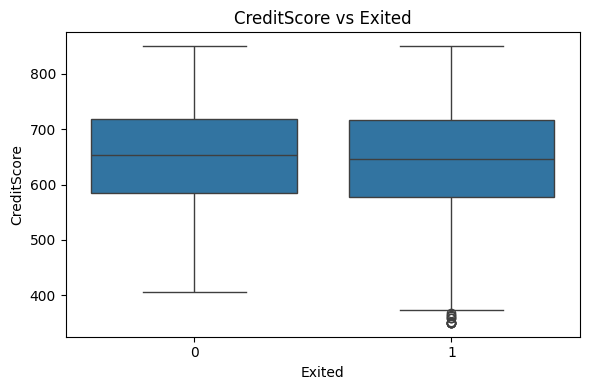

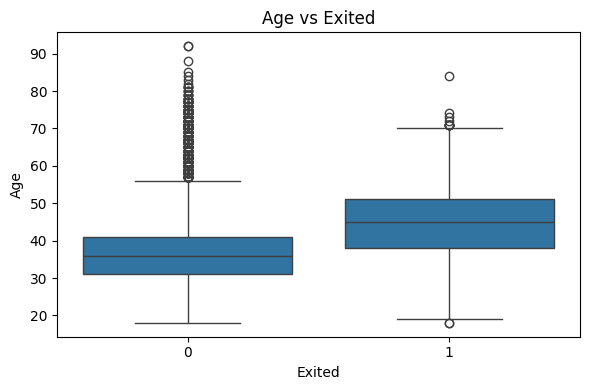

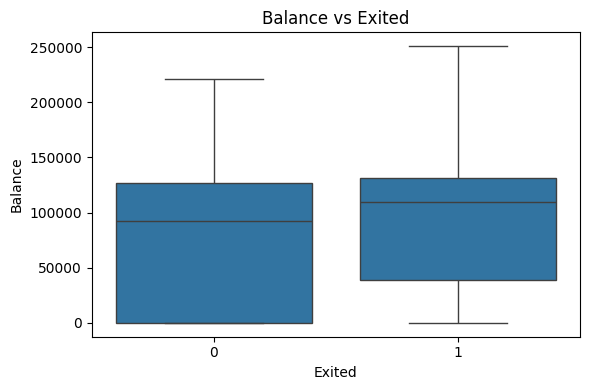

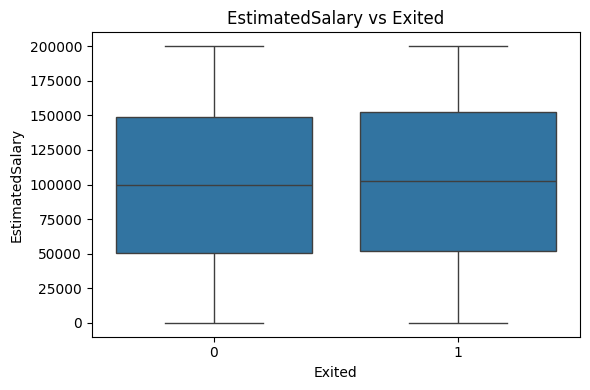

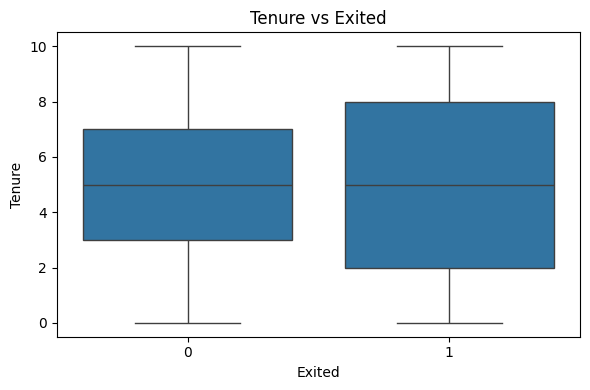

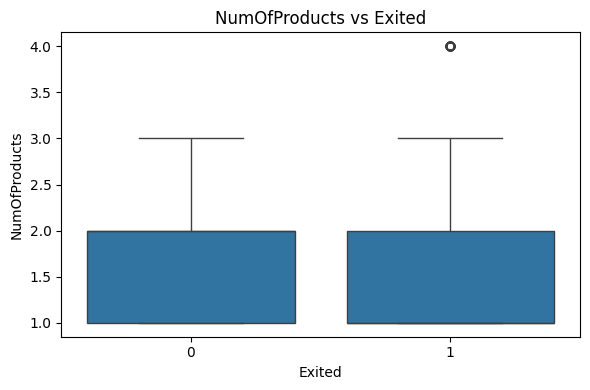

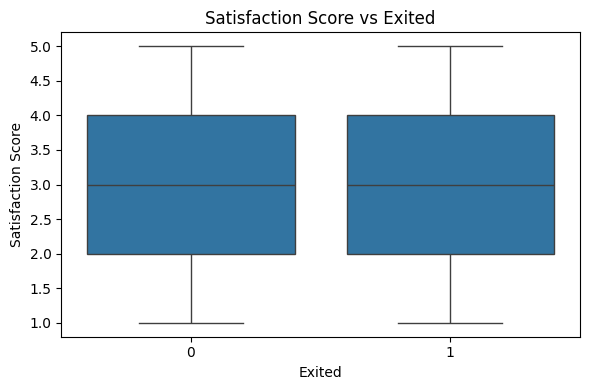

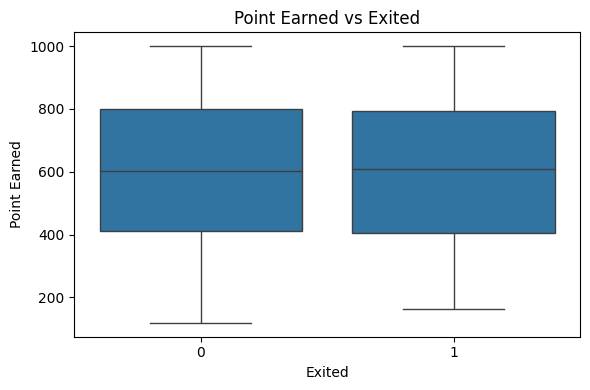

In [26]:
# 📦 Boxplots for numerical features
numeric_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure',
                'NumOfProducts', 'Satisfaction Score', 'Point Earned']

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Exited', y=col, data=df)
    plt.title(f'{col} vs Exited')
    plt.tight_layout()
    plt.show()


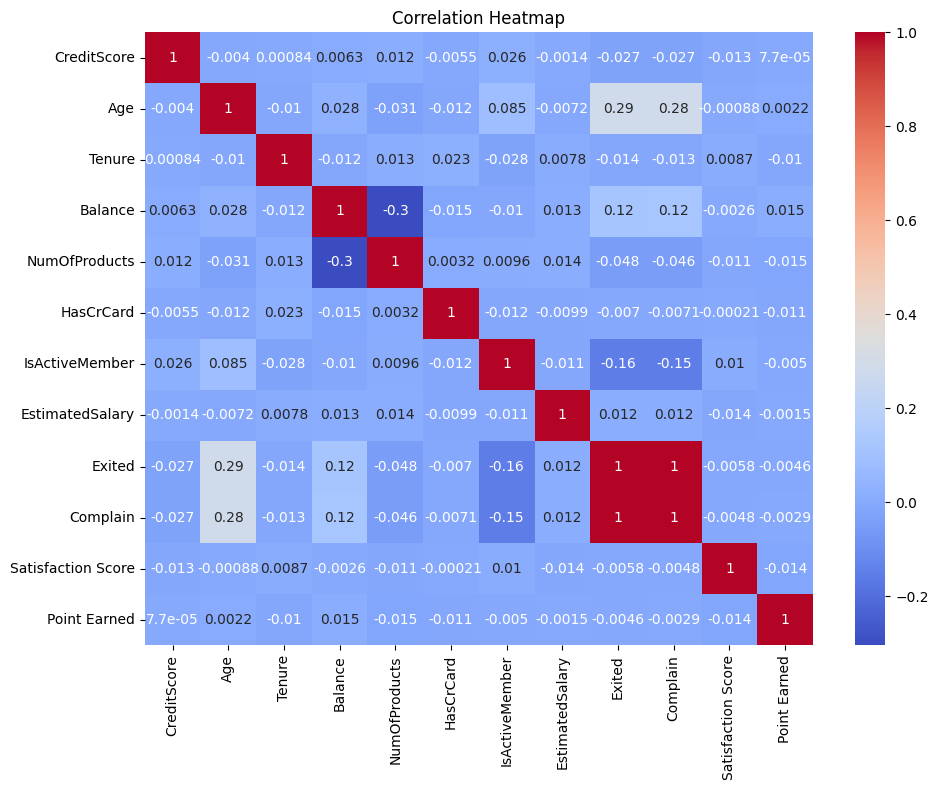

In [27]:
# 🔥 Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


In [28]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [29]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1,DIAMOND,300
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,5,PLATINUM,771
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,3,SILVER,564
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,2,GOLD,339


In [30]:
X = pd.get_dummies(X, columns=['Geography', 'Gender', 'Card Type'], drop_first=True)
X['Satisfaction Score'] = X['Satisfaction Score'].astype('category').cat.codes

In [31]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,464,False,False,False,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,1,2,456,False,True,False,False,False,False
2,502,42,8,159660.80,3,1,0,113931.57,1,2,377,False,False,False,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,4,350,False,False,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,4,425,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,300,False,False,True,False,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,0,4,771,False,False,True,False,True,False
9997,709,36,7,0.00,1,0,1,42085.58,1,2,564,False,False,False,False,False,True
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,339,True,False,True,True,False,False


In [ ]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [40]:
#print shapes
print(f"X_train_temp shape: {X_train_temp.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

X_train_temp shape: (8000, 17)
X_val shape: (1000, 17)
X_test shape: (1000, 17)


In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_temp[numeric_cols])
X_val_scaled = scaler.transform(X_val[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numeric_cols, index=X_train_temp.index)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=numeric_cols, index=X_val.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numeric_cols, index=X_test.index)

X_train_final = pd.concat([X_train_scaled_df, X_train_temp.drop(columns=numeric_cols)], axis=1)
X_val_final = pd.concat([X_val_scaled_df, X_val.drop(columns=numeric_cols)], axis=1)
X_test_final = pd.concat([X_test_scaled_df, X_test.drop(columns=numeric_cols)], axis=1)

print(f'Train shape: {X_train_final.shape}, Val shape: {X_val_final.shape}, Test shape: {X_test_final.shape}')

Train shape: (8000, 17), Val shape: (1000, 17), Test shape: (1000, 17)


In [44]:
model_metrics = {}

def train_and_evaluate(model, X_train, y_train, X_val, y_val, model_name):
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    model_metrics[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

    # Classification Report for Validation Set
    report = classification_report(y_val, y_val_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    print(f"\n{model_name} Classification Report on Validation Set:")
    print(tabulate(report_df, headers='keys', tablefmt='psql', floatfmt='.3f'))

    return model, f1

In [47]:
log_reg = LogisticRegression(random_state=42)
param_grid_log = {'C': [0.01, 0.1, 1, 10], 'max_iter': [100, 200]}
grid_log = GridSearchCV(log_reg, param_grid_log, cv=5, scoring='f1', n_jobs=-1)
grid_log.fit(X_train_temp, y_train_temp)
best_log = grid_log.best_estimator_
best_log_f1 = train_and_evaluate(best_log, X_train_final, y_train_temp, X_val_final, y_val, 'Logistic Regression')
print(f"Best Logistic Regression Params: {grid_log.best_params_}")


Logistic Regression Classification Report on Validation Set:
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |       0.999 |    0.999 |      0.999 |   822.000 |
| 1            |       0.994 |    0.994 |      0.994 |   178.000 |
| accuracy     |       0.998 |    0.998 |      0.998 |     0.998 |
| macro avg    |       0.997 |    0.997 |      0.997 |  1000.000 |
| weighted avg |       0.998 |    0.998 |      0.998 |  1000.000 |
+--------------+-------------+----------+------------+-----------+
Best Logistic Regression Params: {'C': 0.01, 'max_iter': 100}
